# Pandas #

# Lesson 01 #

**Create Data**. We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.

**Get Data**. We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.

**Prepare Data**. Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.

**Analyze Data**. We will simply find the most popular name in a specific year.

**Present Data**.Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

The pandas library is used for all the data analysis excluding a small piece of the data presentation section. The matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.1 (default, Dec  7 2015, 12:58:09) 
[GCC 5.2.0]
Pandas version 0.17.1
Matplotlib version 1.5.1


## Create data ##

The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [3]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
names

['Bob', 'Jessica', 'Mary', 'John', 'Mel']

In [5]:
births

[968, 155, 77, 578, 973]

To merge these two lists together we will use the *zip* function.

In [6]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the *pandas* library to export this data set into a *csv* file.

*df* will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an Excel spreadsheet. Lets take a look below at the contents inside *df*.

In [7]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Export the dataframe to a *csv* file. We can name the file *births1880.csv*. The function *to_csv* will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise. The only parameters we will use are *index* and *header*. Setting these parameters to *True* will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [8]:
df.to_csv('births1880.csv',index=False,header=False)

## Get data ##

To pull in the *csv* file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes. Even though this functions has many parameters, we will simply pass it the location of the text file.

Location = r'C:\Users\david\notebooks\update\births1880.csv'
df = pd.read_csv(Location)

Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape the whole string. Depending on where you save your notebooks, you may need to modify the location above.

If the file is in the same location as the jupyter notebook, this can be simplified.

In [9]:
df = pd.read_csv('births1880.csv')
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


This brings us the our first problem of the exercise. The read_csv function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

If your csv file has header names, skip this part.

In [10]:
df = pd.read_csv('births1880.csv', header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


If we wanted to give the columns specific names, we would have to pass another paramter called names. We can also omit the header parameter.

In [11]:
df = pd.read_csv('births1880.csv', names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

If you wish to delete a file with code in a notebook, you would use:

In [12]:
import os
os.remove('births1880.csv')

## Prepare data ##

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

The *Names* column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The *Births* column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any problems with the data set.

As you can see the Births column is of type int64, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

In [13]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [14]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

## Analyze data ##

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

- Sort the dataframe and select the top row.
- Use the *max()* attribute to find the maximum value.

In [15]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [16]:
# Method 2:
df['Births'].max()

973

## Present data ##

Here we can plot the *Births* column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that *Mel* is the most popular baby name in the data set.

*plot()* is a convenient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section, using *max()*. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

Explain the pieces:
df['Names'] - This is the entire list of baby names, the entire Names column
df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
df['Births'].max() - This is the maximum value found in the Births column

[df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The Births column is equal to 973]

An alternative way could have been to use the Sorted dataframe:
Sorted['Names'].head(1).value

The str() function simply converts an object into a string.

The most popular name


,Names,Births
4,Mel,973


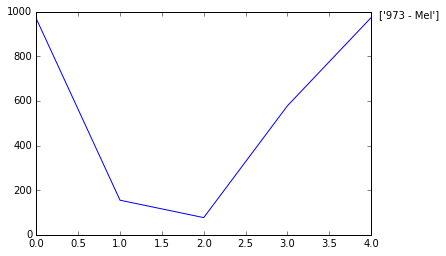

In [17]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()
MaxValue

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values
MaxName

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName
Text

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]

# Lesson 02 #

**Create Data**. We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.

**Get Data**. We will learn how to read in the text file containing the baby names. The data consist of baby names born in the year 1880.

**Prepare Data**. Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.

**Analyze Data**. We will simply find the most popular name in a specific year.

**Present Data**. Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

*Numpy* will be used to help generate the sample data set. Importing the libraries is the first step we will take in the lesson.

In [18]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [19]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.1 (default, Dec  7 2015, 12:58:09) 
[GCC 5.2.0]
Pandas version 0.17.1
Matplotlib version 1.5.1


## Create data ##

The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names.

In [20]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']
names

['Bob', 'Jessica', 'Mary', 'John', 'Mel']

To make a random list of 1,000 baby names using the five above we will do the following:

Generate a random number between 0 and 4
To do this we will be using the functions seed, randint, len, range, and zip.

seed(500) - Create seed

randint(low=0,high=len(names)) - Generate a random integer between zero and the length of the list "names".

names[n] - Select the name where its index is equal to n.

for i in range(n) - Loop until i is equal to n, i.e. 1,2,3,....n.

random_names = Select a random name from the name list and do this n times.

In [21]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

Generate random numbers between 0 and 1000.

In [22]:
# The number of births per name for the year 1880 and print the first 10 numbers.
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Merge the names and the births data set using the zip function.

In [23]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [24]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


Export the dataframe to a text file. We can name the file births1880.txt. The function to_csv will be used to export. The file will be saved in the same location of the notebook unless specified otherwise. The only parameters we will use is index and header. Setting these parameters to False will prevent the index and header names from being exported.

In [25]:
df.to_csv('births1880.txt',index=False,header=False)

## Get data ##

To pull in the text file, we will use the pandas function read_csv.

In [26]:
df = pd.read_csv('births1880.txt')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


Summary says:

- There are 999 records in the data set.
- There is a column named Mary with 999 values.
- There is a column named 968 with 999 values.
- Out of the two columns, one is numeric, the other is non numeric.
- To actually see the contents of the dataframe we can use the head() function which by default will return the first five records. You can also pass in a number n to return the top n records of the dataframe.

In [28]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


This brings us the our first problem of the exercise. The read_csv function treated the first record in the text file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [29]:
df = pd.read_csv('births1880.txt', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


Summary now says:

- There are 1000 records in the data set.
- There is a column named 0 with 1000 values.
- There is a column named 1 with 1000 values.
- Out of the two columns, one is numeric, the other is non numeric.

In [30]:
df.head()

,0,1
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [31]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


If we wanted to give the columns specific names, we would have to pass another paramter called names. We can also omit the header parameter.

In [32]:
df = pd.read_csv('births1880.txt', names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


You can think of the numbers [0,1,2,3,4,...] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the txt file now that we are done using it.

In [33]:
import os
os.remove('births1880.txt')

## Prepare data ##

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "Names" column still only has five unique names.

We can use the unique property of the dataframe to find all the unique records of the "Names" column.

In [34]:
# Method 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [35]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [36]:
# Method 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


Since we have multiple values per baby name, we need to aggregate this data so we only have a baby name appear once. This means the 1,000 rows will need to become 5. We can accomplish this by using the groupby function.

In [37]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


## Analyze data ##

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [38]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [39]:
# Method 2:
df['Births'].max()

106817

## Present data ##

Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Bob is the most popular baby name in the data set.

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


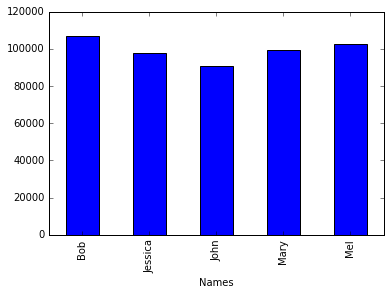

In [40]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

# Lesson 03 #

**Get Data**. Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.

**Prepare Data**. The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.

**Analyze Data**. We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.

**Present Data**. The results will be plotted.

In [41]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [42]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.1 (default, Dec  7 2015, 12:58:09) 
[GCC 5.2.0]
Pandas version: 0.17.1
Matplotlib version 1.5.1


## Create data ##

We create our own test data for analysis.

In [43]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

Now that we have a function to generate our test data, lets create some data and stick it into a dataframe.

In [44]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [45]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to show you how to read and write to Excel files.

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [46]:
import openpyxl
import xlrd

# Save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


## Get data ##

We will be using the read_excel function to read in data from an Excel file. The function allows you to read in specfic tabs by name or location.

In [47]:
# Parse a specific sheet
df = pd.read_excel('Lesson3.xlsx', 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [48]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [49]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


## Prepare data ##

This section attempts to clean up the data for analysis.

1. Make sure the state column is all in upper case.
2. Only select records where the account status is equal to "1".
3. Merge (NJ and NY) to NY in the state column.
4. Remove any outliers (any odd results in the data set).

Let's take a quick look on how some of the State values are upper case and some are lower case.

In [50]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

To convert all the State values to upper case we will use the upper() function and the dataframe's apply attribute. The lambda function simply will apply the upper function to each value in the State column.

In [51]:
# Clean State Column, convert to upper case
#df['State'] = df.State.apply(str.upper)
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [52]:
# Only grab where Status == 1
mask = df['Status'] == 1
mask

StatusDate
2009-01-05     True
2009-01-12     True
2009-01-19    False
2009-01-26    False
2009-02-02     True
2009-02-09    False
2009-02-16    False
2009-02-23    False
2009-03-02    False
2009-03-09     True
2009-03-16    False
2009-03-23    False
2009-03-30    False
2009-04-06     True
2009-04-13    False
2009-04-20    False
2009-04-27     True
2009-05-04    False
2009-05-11    False
2009-05-18    False
2009-05-25     True
2009-06-01    False
2009-06-08    False
2009-06-15    False
2009-06-22    False
2009-06-29    False
2009-07-06     True
2009-07-13    False
2009-07-20     True
2009-07-27     True
              ...  
2012-06-11    False
2012-06-18     True
2012-06-25    False
2012-07-02    False
2012-07-09    False
2012-07-16    False
2012-07-23    False
2012-07-30    False
2012-08-06     True
2012-08-13    False
2012-08-20     True
2012-08-27    False
2012-09-03    False
2012-09-10    False
2012-09-17    False
2012-09-24    False
2012-10-01    False
2012-10-08     True
2012-10-1

In [66]:
df = df[mask]
df

,State,Status,CustomerCount
StatusDate,,,
2009-04-27,NY,1,753
2009-07-27,NY,1,990
2009-09-14,NY,1,772
2009-09-28,NY,1,349
2010-04-12,NY,1,375
2010-08-02,NY,1,261
2010-08-30,NY,1,79
2010-09-06,NY,1,708
2011-02-07,NY,1,588


To turn the NJ states to NY we simply...

[df.State == 'NJ'] - Find all records in the State column where they are equal to NJ.
df.State[df.State == 'NJ'] = 'NY' - For all records in the State column where they are equal to NJ, replace them with NY.

In [54]:
# Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

Now we can see we have a much cleaner data set to work with.

In [55]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the plot() attribute of the dataframe.

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

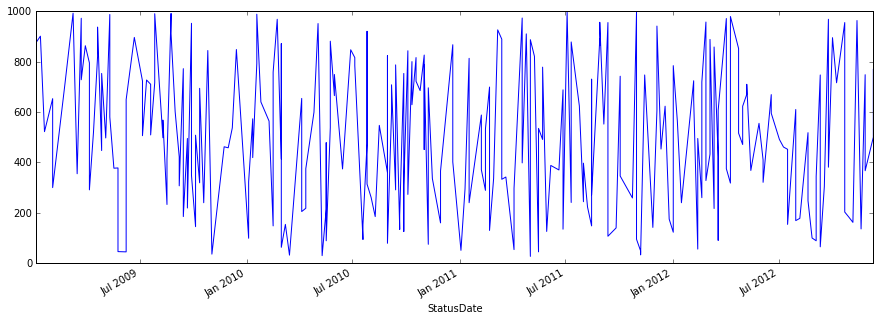

In [56]:
df['CustomerCount'].plot(figsize=(15,5));

If we take a look at the data, we begin to realize that there are multiple values for the same State, StatusDate, and Status combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the CustomerCount column per State, StatusDate, and Status we will get the Total Customer Count per day.

In [57]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


Our task is now to create a new dataframe that compresses the data so we have daily customer counts per State and StatusDate. We can ignore the Status column since all the values in this column are of value 1. To accomplish this we will use the dataframe's functions groupby and sum().

Note that we had to use reset_index . If we did not, we would not have been able to group by both the State and the StatusDate since the groupby function expects only columns as inputs. The reset_index function will bring the index StatusDate back to a column in the dataframe.

In [58]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

The State and StatusDate columns are automatically placed in the index of the Daily dataframe. You can think of the index as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.

Below we delete the Status column since it is all equal to one and no longer necessary.

In [59]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [60]:
# What is the index of the dataframe
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

Lets now plot the data per State.

As you can see by breaking the graph up by the State column we have a much clearer picture on how the data looks like. Can you spot any outliers?

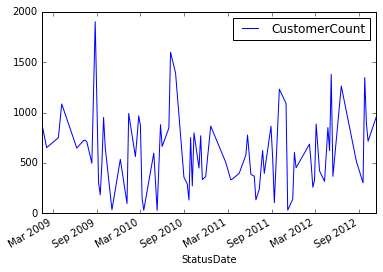

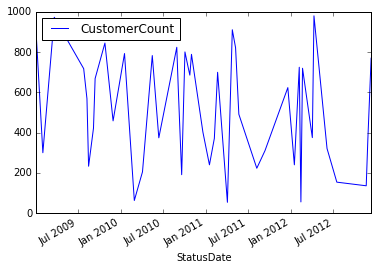

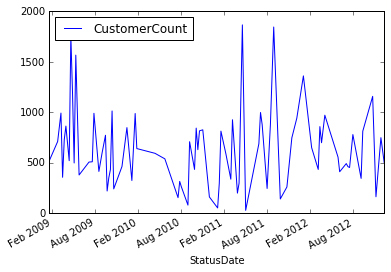

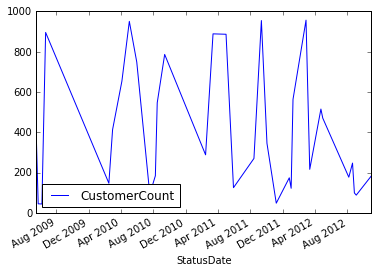

In [61]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

We can also just plot the data on a specific date, like 2012. We can now clearly see that the data for these states is all over the place. since the data consist of weekly customer counts, the variability of the data seems suspect. For this tutorial we will assume bad data and proceed.

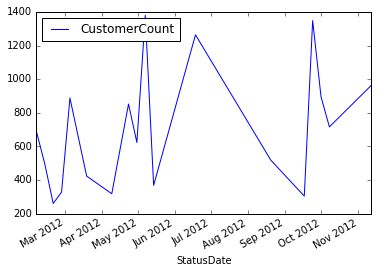

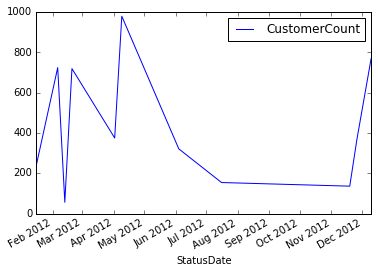

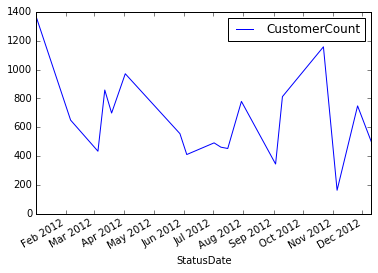

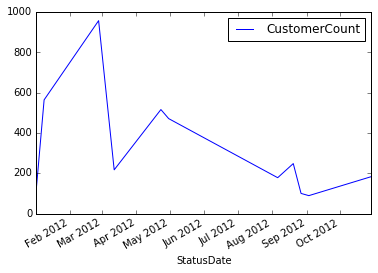

In [62]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.

StateYearMonth - Here we group by State, Year of StatusDate, and Month of StatusDate.
Daily['Outlier'] - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.

We will be using the attribute transform instead of apply. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [63]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

The dataframe named Daily will hold customer counts that have been aggregated per day. The original data (df) has multiple records per day. We are left with a data set that is indexed by both the state and the StatusDate. The Outlier column should be equal to False signifying that the record is not an outlier.

In [64]:
Daily.head()

CustomerCount  Lower   Upper Outlier
State StatusDate                                      
FL    2009-01-12            901  450.5  1351.5   False
      2009-02-02            653  326.5   979.5   False
      2009-03-23            752  376.0  1128.0   False
      2009-04-06           1086  543.0  1629.0   False
      2009-06-08            649  324.5   973.5   False

**Editor note**. I stopped here.

## Analyze data ##

## Present data ##

# Lesson 04 #

# Lesson 05 #

# Lesson 06 #

# Lesson 07 #

# Lesson 08 #

# Lesson 09 #

# Lesson 10 #

# Lesson 11 #

# Ten minutes to Pandas tutorial #

**Editor note**. Everything after this is from "10 minutes to pandas" tutorial.

## Objects ##

### Series ##

A series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

s = pd.Series(data, index=index)

Create a Series by passing a list of values, letting pandas create a default integer index.

In [65]:
s = pd.Series([1,3,5,np.nan,6,8])
s

AttributeError: module 'numpy.random' has no attribute 'nan'

### Dataframe ##

Create a DataFrame by passing a numpy array, with a datetime index and labeled columns.

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

In [ ]:
df2 = pd.DataFrame(np.random.randn(6,4))
df2

Create a DataFrame by passing a dict of objects that can be converted to series-like.

In [ ]:
df3 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
df3

Having specific dtypes.

In [ ]:
df3.dtypes

## Viewing data ##

See the top & bottom rows of the frame.

In [ ]:
df.head()

In [ ]:
df.head(2)

In [ ]:
df.tail(3)

Display the index, columns, and the underlying numpy data.

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df2.values

In [ ]:
df3.values

Describe shows a quick statistic summary of your data.

In [ ]:
df.describe()

In [ ]:
df2.describe()

In [ ]:
df3.describe()

Transpose a dataframe.

In [ ]:
df.T

Sort by an axis.

In [ ]:
df.sort_index(axis=1, ascending=False)

Sort by values.

In [ ]:
df.sort_values(by='B')

## Getting ##

Select a single column, which yields a Series, equivalent to df.A.

In [ ]:
df['A']

In [ ]:
df.A

Select via [], which slices the rows.

In [ ]:
df[0:3]

In [ ]:
df['20130102':'20130104']

In [ ]:
df.loc[dates[0]]

In [ ]:
df.loc[:,['A','B']]

In [ ]:
df.loc['20130102':'20130104',['A','B']]

In [ ]:
df.loc['20130102',['A','B']]

In [ ]:
df.loc[dates[0],'A']

In [ ]:
df.at[dates[0],'A']

### Boolean indexing ###

Use a single column’s values to select data.

In [ ]:
df[df.A > 0]

In [ ]:
df[df > 0]

In [ ]:
df4 = df.copy()
df4['E'] = ['one', 'one','two','three','four','three']
df4

## Missing data ##

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df5 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df5.loc[dates[0]:dates[1],'E'] = 1
df5

To drop any rows that have missing data.

In [ ]:
df5.dropna(how='any')

## Statistics ##

Operations in general exclude missing data.

Calculate a descriptive statistic.

In [ ]:
df.mean()

In [ ]:
df.mean(1)

In [ ]:
df.A.mean()

In [ ]:
df['A'].mean()

In [ ]:
df[['A','B','D']].mean()

## Apply ##

Apply functions to the data.

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

## Pivot tables ##

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....:
df

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

## Getting data in and out ##

### CSV ###

Writing to a csv file.

In [ ]:
df.to_csv('foo.csv')
df

Reading from a csv file.

In [ ]:
pd.read_csv('foo.csv')

### Excel ###

Writing to an Excel file.

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an Excel file.

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

Delete the file. We are done with it.

In [ ]:
os.remove('foo.csv')